In [1]:
!pip install scikit-fuzzy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=8c7f9608d00777614f78dcd34cd69d36eaea1b325ff5f155e4f4c50c6fd3b10f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
import skfuzzy as fuzz
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


In [4]:
base = pd.read_csv('UCI_Credit_Card.csv')
base.shape

(30000, 25)

In [5]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base["BILL_AMT2"] + base["BILL_AMT3"] +  base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']
     

In [13]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [14]:
X = base.iloc[:,[1,25]].values

In [16]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [19]:
X.shape

(30000, 2)

In [20]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
r = fuzz.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [22]:
r

(array([[ 0.97537268, -0.42055357],
        [-0.738885  , -0.30174307],
        [ 0.74968946,  2.01631013]]),
 array([[0.06225463, 0.12402046, 0.01586404, ..., 0.03497376, 0.02980693,
         0.01801369],
        [0.9118179 , 0.84865415, 0.97914564, ..., 0.95010623, 0.95613024,
         0.97292033],
        [0.02592748, 0.02732539, 0.00499033, ..., 0.01492001, 0.01406283,
         0.00906597]]),
 array([[0.36171772, 0.26960985, 0.34352772, ..., 0.32077831, 0.23933535,
         0.39662403],
        [0.27728322, 0.11523297, 0.63384702, ..., 0.22629966, 0.34584345,
         0.52213872],
        [0.36099906, 0.61515717, 0.02262525, ..., 0.45292203, 0.4148212 ,
         0.08123725]]),
 array([[2.12929821, 1.36362424, 1.5727377 , ..., 2.03771065, 1.70031676,
         1.90753625],
        [0.55637583, 0.52128595, 0.20018867, ..., 0.39095577, 0.30021331,
         0.25955868],
        [3.29945475, 2.90508064, 2.80413258, ..., 3.1198175 , 2.47543841,
         2.68885276]]),
 array([25808.283818

In [23]:
previsoes_porcentagem = r[1]

In [24]:
previsoes_porcentagem.shape

(3, 30000)

In [25]:
previsoes_porcentagem

array([[0.06225463, 0.12402046, 0.01586404, ..., 0.03497376, 0.02980693,
        0.01801369],
       [0.9118179 , 0.84865415, 0.97914564, ..., 0.95010623, 0.95613024,
        0.97292033],
       [0.02592748, 0.02732539, 0.00499033, ..., 0.01492001, 0.01406283,
        0.00906597]])

In [31]:
previsoes_porcentagem[0][0]

0.06225462688795921

In [32]:
previsoes_porcentagem[1][0]

0.9118178958526209

In [29]:
previsoes_porcentagem[2][0]

0.02592747725941989

In [30]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [33]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [34]:
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
previsoes[5000]

1

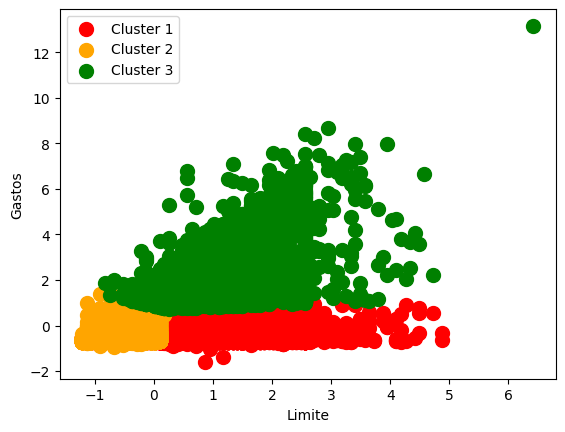

In [36]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1,1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();